In [4]:
# Mounting Google Drive in Colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


sns.set(style="darkgrid")

In [6]:
data = pd.read_csv("/content/gdrive/MyDrive/banktransaction.csv")

# Data Structure and Content

The dataset consists of 2340 rows and 7 columns, which include the following columns:


**typeofaction**: Action type (either "transfer" or "cash-in").

**sourceid**: Source account ID.

**destinationid**: Destination account ID.

**amountofmoney**: Amount of money involved in the transaction.

**date**: Date and time of the transaction.

**isfraud**: Whether the transaction is fraudulent (1 for yes, 0 for no).

**typeoffraud**: Type of fraud ('type1', 'type2', 'type3' if applicable).


In [7]:
data.head(10)

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1
5,cash-in,30105,54971,494528,2019-04-06 11:18:00,1,type1
6,cash-in,30105,62257,494528,2019-04-23 08:20:00,1,type1
7,cash-in,30105,1020,494528,2019-07-04 08:59:00,1,type1
8,cash-in,30105,98751,494528,2019-05-06 12:49:00,1,type1
9,cash-in,30105,82016,494528,2019-06-09 12:27:00,1,type1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   typeofaction   2340 non-null   object
 1   sourceid       2340 non-null   int64 
 2   destinationid  2340 non-null   int64 
 3   amountofmoney  2340 non-null   int64 
 4   date           2340 non-null   object
 5   isfraud        2340 non-null   int64 
 6   typeoffraud    2340 non-null   object
dtypes: int64(4), object(3)
memory usage: 128.1+ KB


In [9]:
data.dtypes

typeofaction     object
sourceid          int64
destinationid     int64
amountofmoney     int64
date             object
isfraud           int64
typeoffraud      object
dtype: object

We converted the 'isfraud' column to boolean and transformed 'date' to datetime. Meanwhile, 'sourceid' and 'destinationid' were changed to categorical types for efficient storage and analysis in the data'

In [10]:
data['isfraud'] = data['isfraud'].astype('bool')
data['date'] = data['date'].apply(pd.to_datetime)
data['sourceid'] = data['sourceid'].astype('category')
data['destinationid'] = data['destinationid'].astype('category')

In [11]:
data.shape

(2340, 7)

In [12]:
data.describe()

,amountofmoney
count,2.340000e+03
mean,2.508583e+06
std,2.560434e+06
min,1.333200e+04
25%,3.359140e+05
50%,1.162354e+06
75%,4.686559e+06
max,7.952497e+06


# Data Cleaning

There are no duplicate rows

In [13]:
data.drop_duplicates(inplace= True)
data.shape

(2340, 7)

There are no missing values

In [14]:
data.isna().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64

There are no outliers

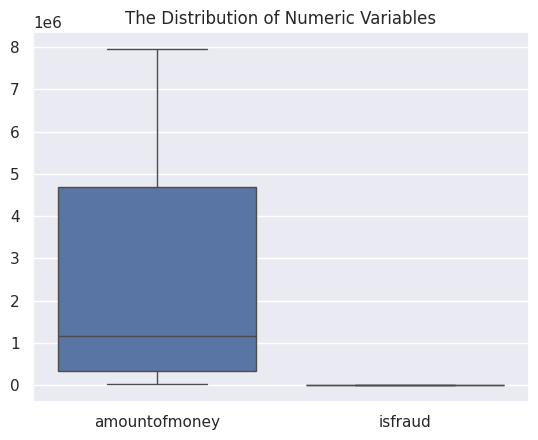

In [15]:
sns.boxplot(data)
plt.title("The Distribution of Numeric Variables")
plt.show()

# Exploratory Data Analysis

After ensuring that the data is clean, we now proceed with exploration and analysis

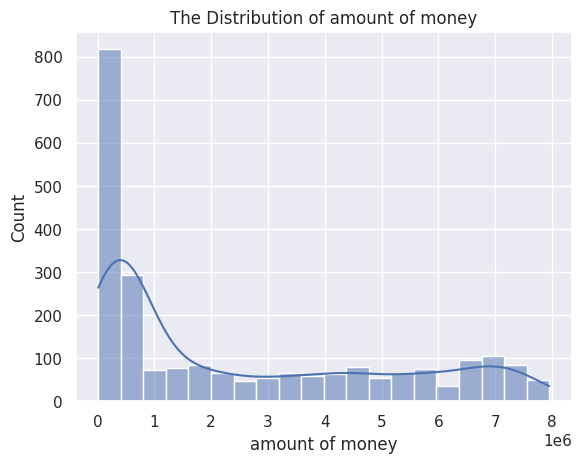

In [16]:
sns.histplot(data['amountofmoney'], bins=20, kde = True)
plt.title('The Distribution of amount of money')
plt.xlabel('amount of money')
plt.ylabel('Count')
plt.show()

### **Insights:**


*   The majority of transactions involve amounts of money ranging from 0 to 10000, with a peak at around 800.
*   As the amount increases beyond 10000, the frequency of transactions sharply decreases.
*   The distribution is right-skewed, indicating that most transactions involve smaller amounts, with only a few involving larger sums



<ipython-input-17-3c67bead5a55>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isfraud', data=data,palette='Set2')


Text(0.5, 1.0, 'Count of isfraud')

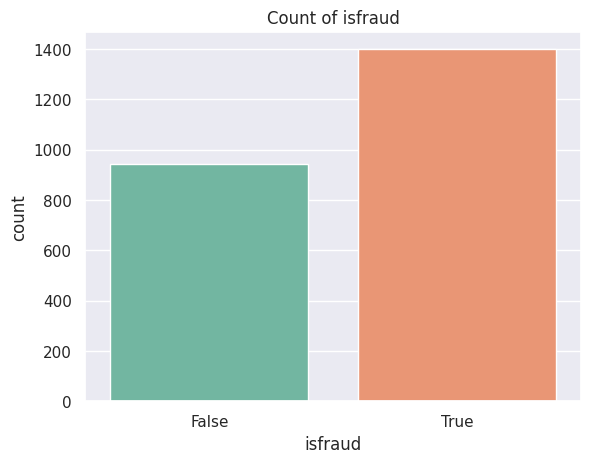

In [17]:
sns.countplot(x='isfraud', data=data,palette='Set2')
plt.title('Count of isfraud')

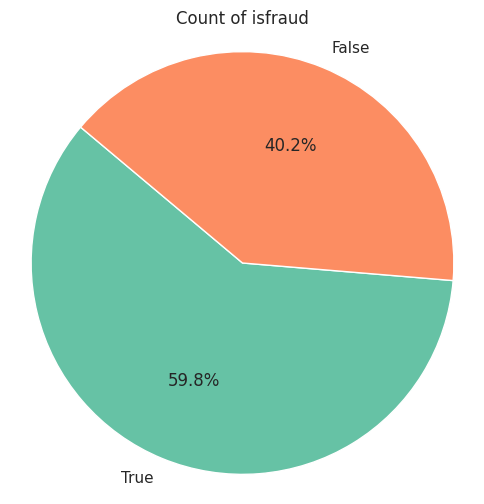

In [29]:
fraud_counts = data['isfraud'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Count of isfraud')
plt.axis('equal')
plt.show()

### **Insights:**


*   A significant number of transactions in the dataset are fraudulent, with a difference of 485 compared to non-fraudulent transactions.



<ipython-input-35-043254b76ea4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='typeoffraud', data=data,palette='Set2')


Text(0.5, 1.0, 'Count of type of fraud')

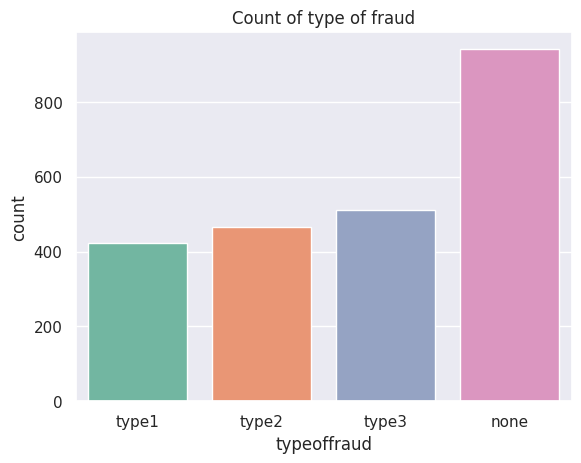

In [35]:
sns.countplot(x='typeoffraud', data=data,palette='Set2')
plt.title('Count of type of fraud')

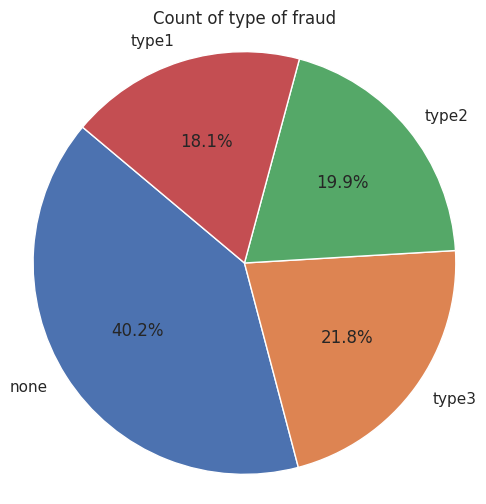

In [33]:
typeoffraud_counts = data['typeoffraud'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(typeoffraud_counts, labels=typeoffraud_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of type of fraud')
plt.axis('equal')
plt.show()

### **Insights:**


*   Among the fraudulent transactions, the most common type of fraud is 'type3', followed by 'type2', and then 'type1'.
*  'type3' appears to be the predominant type of fraud in the dataset.



<ipython-input-19-a3a7c0cba6f9>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date', y='amountofmoney', data=data,palette='Set2')


Text(0.5, 1.0, 'Distribution of the amount of money by date')

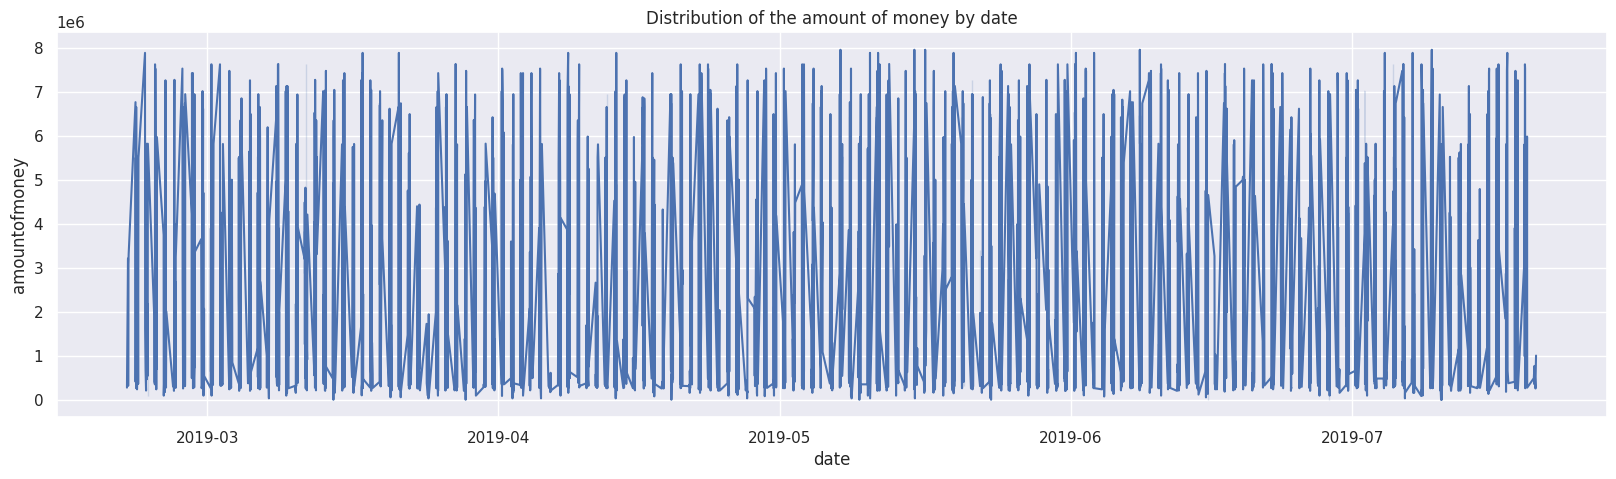

In [19]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='date', y='amountofmoney', data=data,palette='Set2')
plt.title('Distribution of the amount of money by date')

### **Insights:**


*   The amount of money involved in transactions fluctuates over time, ranging between 10000 and 8000000.
*  There is no clear trend or pattern observed in the fluctuation of transaction amounts over the specified date range.


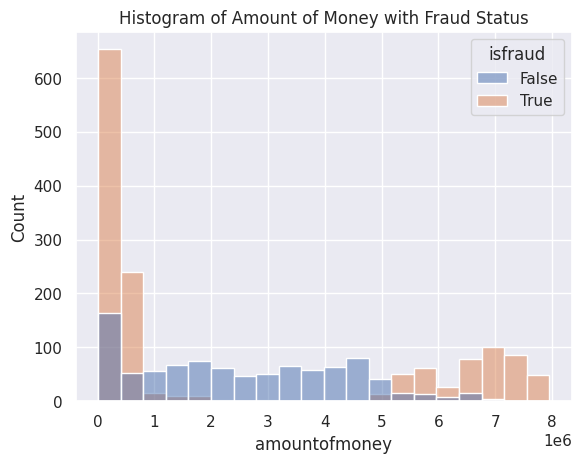

In [20]:
sns.histplot(data=data, x='amountofmoney', bins=20, hue='isfraud')
plt.title('Histogram of Amount of Money with Fraud Status')
plt.show()

### **Insights:**


*   Transactions without fraud tend to involve relatively stable amounts of money.
*   In contrast, most fraudulent transactions occur within two main ranges: between 0 and 1000000, and between 5000000 and 8000000.
*   This suggests that fraudulent activities are more likely to involve either smaller or larger amounts, with fewer fraudulent transactions occurring in between these ranges.



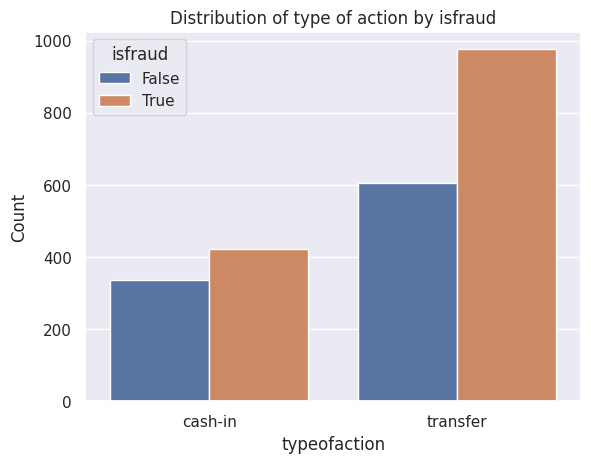

In [21]:
cou=sns.countplot(data=data, x="typeofaction", hue="isfraud")
cou.set_title('Distribution of type of action by isfraud')
plt.ylabel('Count')
plt.show()

### **Insights:**


*   The 'transfer' action is more common than the 'cash-in' action in the dataset.
*   Both types of actions have a higher number of fraudulent transactions compared to non-fraudulent ones.
*   Fraudulent transactions outnumber non-fraudulent ones across both action types, indicating that fraudulent activities are prevalent regardless of the type of action involved.

